In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
tf.__version__

'2.4.0'

In [5]:
# load dataset
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)


Label: truck


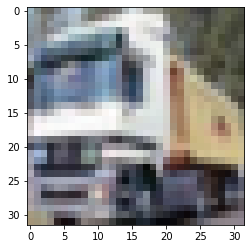

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plt.imshow(X_train[1])
print('Label:',classes[y_train[1][0]])

In [7]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [8]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32')
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32')

In [9]:
y_train_categorical[0:2]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
y_train[0:2]

array([[6],
       [9]], dtype=uint8)

In [11]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 132s 84ms/step - loss: 1.9307 - accuracy: 0.3042


Predicted Label: ship


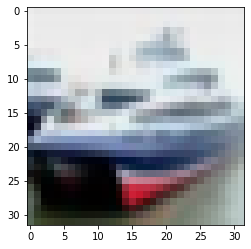

In [14]:
plt.imshow(X_test_scaled[1])
print('Predicted Label:',classes[np.argmax(model.predict(X_test_scaled)[1])])

In [17]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [23]:
# Measure training time on a CPU
%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 127s 80ms/step - loss: 1.9314 - accuracy: 0.3033


In [ ]:
# Measure training time on a GPU 
%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)